
**Name**:- **Saurabh**

**Affiliation** :- **IIA** (PhD)

**ID No.** :- **3254**


### **Problem 1**
## **Problem 1**

Consider the figure below where a pure Hydrogen gas cloud is emitting thermal radiation at a temperature
$$
T_c(r) = 10^7 \exp\!\left[-7\left(\frac{r}{R_c}\right)^{10}\right]\ \text{K}.
$$

The cloud radius and particle density are
$$
R_c = 2\ \text{light-seconds},\qquad n_H = 10^4\ \text{cm}^{-3},
$$
and the Hydrogen absorption cross section is
$$
\sigma_H = 10^{-18}\ \text{cm}^2.
$$
**Tasks**

1. Derive the specific intensity $I_{5000\text{\AA}}(b)$ in the direction of the drawn rays as a function of the impact parameter $b$. An integral form of the solution is acceptable.  
2. Plot $I_{5000\text{\AA}}$ versus $b/R_c$. Label axes with proper units (e.g., $b/R_c$ on the x-axis and intensity units on the y-axis).  
3. Assuming the observed spectrum at each $b$ can be represented by a blackbody, compute and plot the blackbody temperature $T_{\mathrm{obs}}(b)$ versus $b/R_c$.


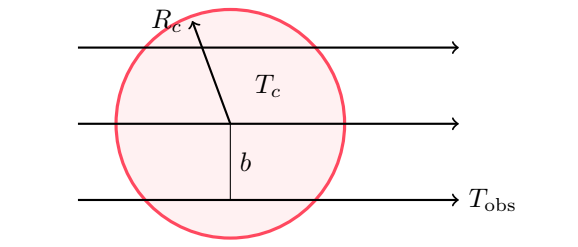

In [ ]:
from IPython.display import Image, display

# Display the problem figure
display(Image(filename='ass_2.png'))


/tmp/ipython-input-3839449324.py:32: RuntimeWarning: divide by zero encountered in divide
  T_obs = ( h * c ) / ( lam * kB * np.log( ( 2 * h * c ** 2 / ( I_vals * ( lam ** 5 ) ) + 1 ) ) )


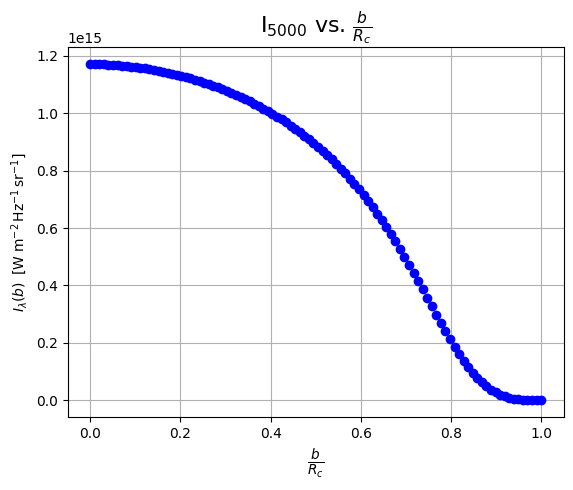

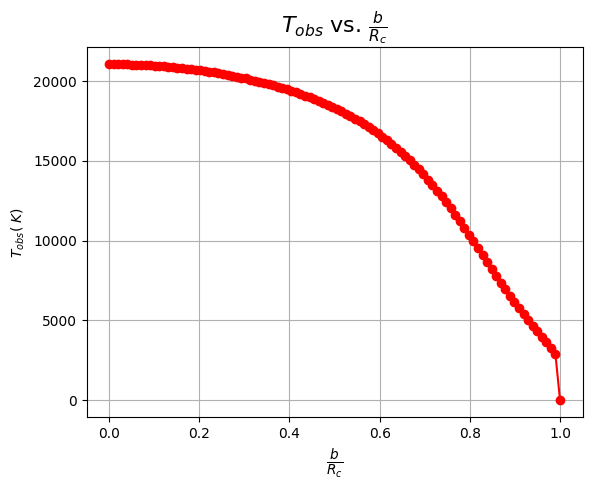

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

h  = 6.6e-34    # J s
c  = 3e8     # m / s
kB = 1.3e-23      # J / K
R_c = 2*c # m

alpha = 1e-12 # m^-1
lam = 5000.0 * 1e-10  # m
T_0 = 1e7  # central temperature scale in K
R_0 = R_c  # solar radius in m

# Defining Integrand
def I_of_b(b):
    smax = np.sqrt(R_c**2 - b**2)
    def integrand(s):
        r = np.sqrt(b**2 + s**2)
        T = T_0 * np.exp(-7 * (r/R_0)**10)
        x = h*c/(lam*kB*T)
        B = (2*h*c**2)/(lam**5 * (np.exp(x) - 1.0))
        return alpha * B * np.exp(-alpha * (s))
    val, _ = quad(integrand, -smax, smax)
    return val


b_fracs = np.linspace(0, 1, 100)
I_vals = [I_of_b(bf*R_c) for bf in b_fracs]
I_vals = np.array(I_vals)

T_obs = ( h * c ) / ( lam * kB * np.log( ( 2 * h * c ** 2 / ( I_vals * ( lam ** 5 ) ) + 1 ) ) )



# Plot_s
plt.plot(b_fracs, I_vals, 'bo')
plt.xlabel(r'$\frac{b}{R_c}$', fontsize=14)
plt.ylabel(r"$I_\lambda(b)\; \; [\mathrm{W \; m^{-2}\, Hz^{-1}\, sr^{-1}}]$")
plt.title(r'$\mathrm{I}_{5000}$ vs. $\frac{b}{R_c}$', fontsize=16)
plt.grid(True)
plt.savefig("Intensity_variation.png", dpi=200, bbox_inches='tight')
plt.show()


plt.plot(b_fracs, T_obs, color='red', marker='o')
plt.xlabel(r'$\frac{b}{R_c}$', fontsize=14)
plt.ylabel(r"$T_{obs} (\; K)$")
plt.title(r'$T_{obs}$ vs. $\frac{b}{R_c}$', fontsize=16)
plt.grid(True)
plt.savefig("Temperature_variation.png", dpi=200, bbox_inches='tight')
plt.show()

Fitted parameters: a=21307.078221043204, b=-6753.487552493717, c=28095.947302466866, d=-64261.586784542465, e=23145.38447706078


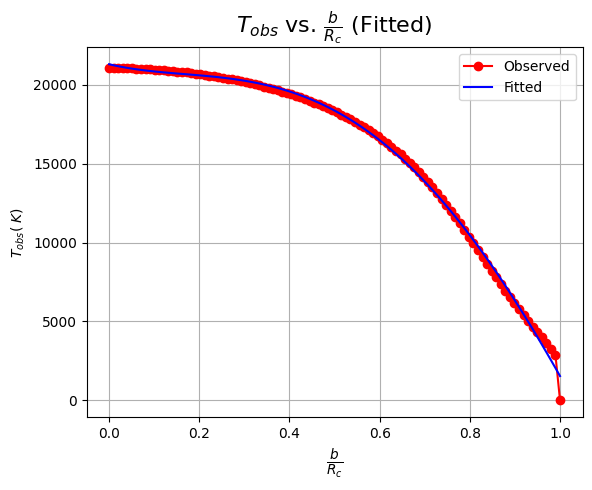

The temperature variation with b/R_c can be approximated by the polynomial: T_obs = 21307.08 + -6753.49*(b/R_c) + 28095.95*(b/R_c)^2 + -64261.59*(b/R_c)^3 + 23145.38*(b/R_c)^4


In [ ]:
from scipy.optimize import curve_fit

# Define a polynomial function to fit the data
def poly_fit(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

# Fit the polynomial to the observed temperature data
params, covariance = curve_fit(poly_fit, b_fracs, T_obs)

# Extract the fitted parameters
a, b, c, d, e = params

# Print the fitted parameters
print(f"Fitted parameters: a={a}, b={b}, c={c}, d={d}, e={e}")

# Generate the fitted curve
T_fit = poly_fit(b_fracs, *params)

# Plot the observed and fitted temperature curves
plt.plot(b_fracs, T_obs, color='red', marker='o', label='Observed')
plt.plot(b_fracs, T_fit, color='blue', linestyle='-', label='Fitted')
plt.xlabel(r'$\frac{b}{R_c}$', fontsize=14)
plt.ylabel(r"$T_{obs} (\; K)$")
plt.title(r'$T_{obs}$ vs. $\frac{b}{R_c}$ (Fitted)', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Describe how temperature varies with b/R_c based on the fitted parameters
print(f"The temperature variation with b/R_c can be approximated by the polynomial: T_obs = {a:.2f} + {b:.2f}*(b/R_c) + {c:.2f}*(b/R_c)^2 + {d:.2f}*(b/R_c)^3 + {e:.2f}*(b/R_c)^4")